# Разработка модели отбора коров для хозяйства «Вольный луг»

### Описание проекта: 
Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным. 

### Цель исследования: 
Наша цель - разработать модель для отбора коров при помощи машинного обучения по определенным параметрам: выявить вкус молока у коров компании «ЭкоФерма» Нужно создать две прогнозные модели для отбора бурёнок в поголовье:
 - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
 - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

Удой коров - не менее 6000 кг.
Вкус молока - вкусное.

### Ход исследования: 
Исследование включает в себя следующие этапы:
 - Подготовка данных на представленных датасетах (информация о коровах фермера, информация о коровах компании ЭкоФерма);
 - Исследовательский анализ данных (сравнение коров Вольный луг и ЭкоФерма
 - Корреляционный анализ признаков в датасете 
 - Обучение модели на данных хозяйства "Вольный луг" и проверка модели на представленной компании «ЭкоФерма» базе данных.

## Содержание

1. [Загрузка данных](#1) 
2. [Предобработка данных](#2) 
3. [Исследовательский анализ данных](#3)
4. [Корреляционный анализ](#4)
5. [Обучение модели линейной регрессии](#5)
6. [Обучение модели логистической регрессии](#6)
7. [Итоговые выводы](#7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as st
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from decimal import Decimal
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score,
    confusion_matrix, 
    recall_score, 
    precision_score,
    precision_recall_curve,
    PrecisionRecallDisplay
)

<a id="1"></a> 
## Загрузка данных

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', decimal = ',', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', decimal = ',', sep=';')

In [3]:
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [4]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [5]:
ferma_dad

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [6]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

In [7]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<a id="2"></a> 
##  Предобработка данных

In [9]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [10]:
ferma_main.rename(
    columns = {'Удой, кг':'удой_кг',
               'ЭКЕ (Энергетическая кормовая единица)':'эке',
               'Сырой протеин, г':'сырой_протеин_г',
               'СПО (Сахаро-протеиновое соотношение)':'спо',
               'Порода':'порода',
               'Тип пастбища':'тип_пастбища',
               'порода папы_быка':'порода_папы_быка',
               'Жирность,%':'жирность_%',
               'Белок,%':'белок_%',
               'Вкус молока':'вкус_молока',
               'Возраст':'возраст',
               'порода папы_быка':'порода_папы_быка'},
    inplace=True)

In [11]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность_%        634 non-null    float64
 9   белок_%           634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [12]:
ferma_dad.rename(columns = {'Имя Папы': 'имя_папы'}, 
              inplace=True)
ferma_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [13]:
cow_buy.rename(columns = {'Порода': 'порода',
                          'Тип пастбища': 'тип_пастбища',
                          'порода папы_быка': 'порода_папы_быка',
                          'Имя_папы': 'имя_папы',
                          'Текущая_жирность,%': 'текущая_жирность_%',
                          'Текущий_уровень_белок,%':'текущий_уровень_белка_%',
                          'Возраст': 'возраст'
                         }, 
              inplace=True)
cow_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белка_%', 'возраст'],
      dtype='object')

### 2.2 проверим на пропуски

In [14]:
ferma_main.isna().sum()

id                  0
удой_кг             0
эке                 0
сырой_протеин_г     0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность_%          0
белок_%             0
вкус_молока         0
возраст             0
dtype: int64

In [15]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [16]:
cow_buy.isna().sum()

порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белка_%    0
возраст                    0
dtype: int64

Пропусков нет

### 2.3 избавляемя от дубликатов

Проверяем на наличие явных дубликатов

In [17]:
ferma_main.duplicated().sum()

5

In [18]:
ferma_main.duplicated().mean() * 100

0.7886435331230284

Избавимся от дубликатов

In [19]:
ferma_main.drop_duplicates(inplace=True)
ferma_main.duplicated().sum()

0

In [20]:
ferma_dad

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [21]:
cow_buy.duplicated().sum()

4

In [22]:
(cow_buy.duplicated().mean() * 100)

20.0

Дубликатов по количеству коров - 4. Можно было бы удалить эти данные, но это сократит базу данных на 20%.Нужно уточнить информацию у продавца о наличии этих 4 коров. Оставим как есть.

Проверим на неяные дубликаты

In [23]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [24]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [25]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные','Равнинное')

In [26]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [27]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл','Айдиал')

In [28]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [29]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [30]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [31]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [32]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [33]:
cow_buy['тип_пастбища'] = (
    cow_buy['тип_пастбища']
    .replace(['равнинное'],'Равнинное')
    .replace(['холмистое'],'Холмистое')
)

In [34]:
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [35]:
cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [36]:
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

### 2.4 Изменение тип данных.

__Вывод:__ Мы подготовили данные для дальнейшей работы.

<a id="3"></a> 
## Исследовательский анализ данных

Проведем статистический анализ всех признаков.

In [37]:
ferma_main.describe()

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


_Характеристики коровы: id, Порода, порода папы_быка, Возраст._

Text(0.5, 1.0, 'Возраст')

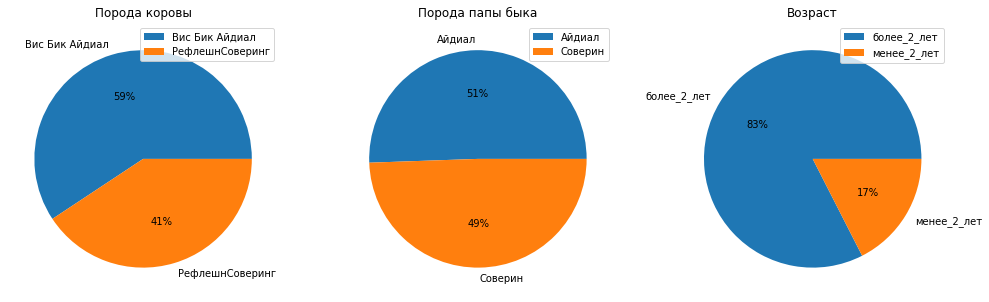

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(17,5)
(
    ferma_main
    .pivot_table(
        index='порода',
        values=['id'],
        aggfunc='count')
    .plot.pie(ax=ax1,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    ferma_main
    .pivot_table(
        index='порода_папы_быка',
        values='id',
        aggfunc='count')
    .plot.pie(ax=ax2,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    ferma_main
    .pivot_table(
        index='возраст',
        values='id',
        aggfunc='count')
    .plot.pie(ax=ax3,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
ax1.set_title('Порода коровы')
ax2.set_title('Порода папы быка')
ax3.set_title('Возраст')

Вывод: Коров Вис Бик Айдиал больше у фермера, а возраст коров на 83% - старше 2 лет

Характеристика пастбища: Тип пастбища.

array([<AxesSubplot:>], dtype=object)

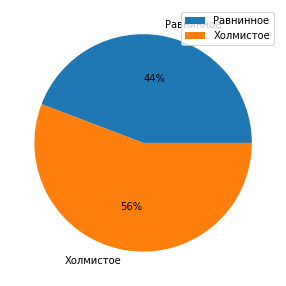

In [39]:
(
    ferma_main
    .pivot_table(
        index='тип_пастбища',
        values='id',
        aggfunc='count')
    .plot.pie(ylabel='',autopct='%1.0f%%', subplots=True, figsize=(5,5))
)

Вывод: 56% коров у фермера в основном пасутся на холмистой местности, остальные на равнинной.

_Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)._

Text(0.5, 1.0, 'СПО')

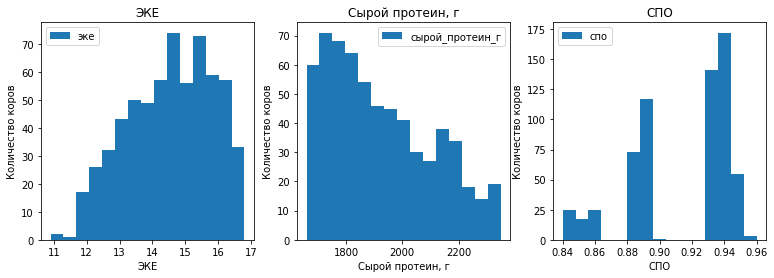

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13,4))
(
    ferma_main.pivot_table(
        index='id',
        values=['эке'])
    .plot(ax=ax1, kind='hist', bins=15)     
)
(
    ferma_main.pivot_table(
        index='id',
        values=['сырой_протеин_г'])
    .plot(ax=ax2,kind='hist', bins=15)     
)    
(
    ferma_main.pivot_table(
        index='id',
        values=['спо'])
    .plot(ax=ax3,kind='hist', bins=15)     
)
ax1.set_xlabel('ЭКЕ')
ax1.set_ylabel('Количество коров')
ax1.set_title('ЭКЕ')
ax2.set_xlabel('Сырой протеин, г')
ax2.set_ylabel('Количество коров')
ax2.set_title('Сырой протеин, г')
ax3.set_xlabel('СПО')
ax3.set_ylabel('Количество коров')
ax3.set_title('СПО')

__Вывод:__ По количеству компонентов в корме коров, в среднем у коровы ЭКЕ (Энергетическая кормовая единица) - 14.5 и 15.5, Сырой протеин - 1750 грамм, СПО (Сахаро-протеиновое соотношение) - 0.94.

_Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока._

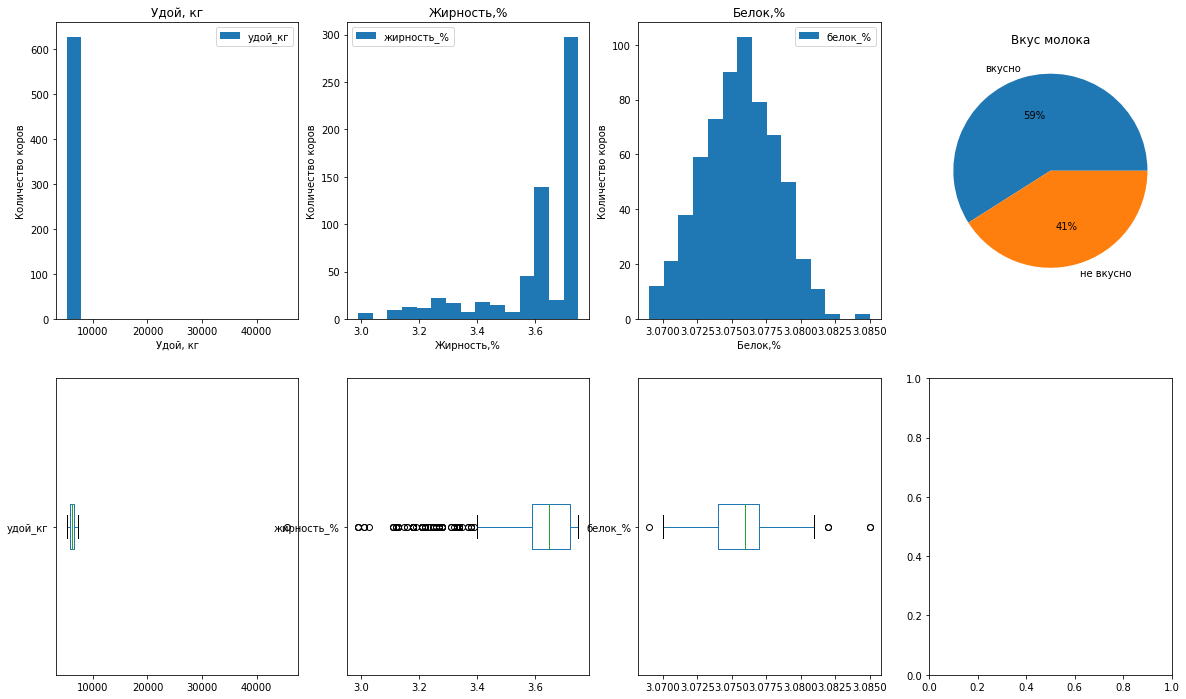

In [41]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,12))
(
    ferma_main.pivot_table(
        index='id',
        values=['удой_кг'])
    .plot(ax=ax1,kind='hist', bins=15)     
)
(
    ferma_main.pivot_table(
        index='id',
        values=['жирность_%'])
    .plot(ax=ax2, kind='hist', bins=15)     
)
(
    ferma_main.pivot_table(
        index='id',
        values=['белок_%'])
    .plot(ax=ax3, kind='hist', bins=15)     
)
(
    ferma_main.pivot_table(
        index='вкус_молока',
        values='id',
        aggfunc='count')
    .plot.pie(ax=ax4,ylabel='',autopct='%1.0f%%', subplots=True, legend=False)
)
(
    ferma_main.pivot_table(
        index='id',
        values=['удой_кг'])
    .plot(ax=ax5, kind='box',subplots=True, vert=False)     
)
(
    ferma_main.pivot_table(
        index='id',
        values=['жирность_%'])
    .plot(ax=ax6, kind='box',subplots=True,vert=False)     
)
(
    ferma_main.pivot_table(
        index='id',
        values=['белок_%'])
    .plot(ax=ax7, kind='box',subplots=True,vert=False)
)
ax1.set_xlabel('Удой, кг')
ax1.set_ylabel('Количество коров')
ax1.set_title('Удой, кг')
ax2.set_xlabel('Жирность,%')
ax2.set_ylabel('Количество коров')
ax2.set_title('Жирность,%')
ax3.set_xlabel('Белок,%')
ax3.set_ylabel('Количество коров')
ax3.set_title('Белок,%')
ax4.set_title('Вкус молока');

In [42]:
ferma_main[ferma_main['удой_кг'] > 10000]

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Имеется 1 значение удоя выше 10 тысяч кг.Значение может быть из-за ошибочного ввода или неправильного расчета за определенный период времени. Удалим его.

In [43]:
ferma_main = ferma_main[ferma_main['удой_кг'] < 10000]

__Вывод:__ Больше всего молока производится с жирностью от 3.6 % с содержанием белка 3.076 %. В данных видим выбросы жирности: очень редко встречается молоко жирностью меньше 3.5 %.

<a id="4"></a> 
## Корреляционный анализ

Проведем корреляционный анализ признаков в датасете ferma_main.csv

Построим тепловую карту датасета ferma_main.csv

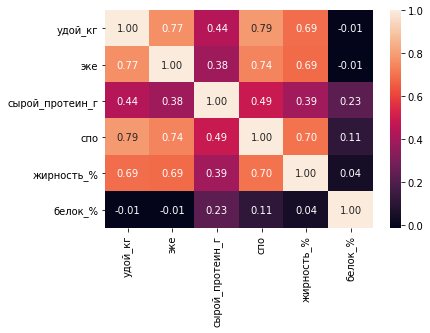

In [44]:
sns.heatmap(ferma_main[['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']].corr(method='spearman'), annot=True, fmt='.2f');

## ЭКЕ - УДОЙ

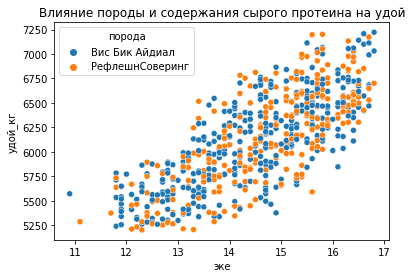

In [45]:
sns.scatterplot(x='эке', y='удой_кг', data=ferma_main, palette='tab10', hue='порода')
plt.title('Влияние породы и содержания сырого протеина на удой');

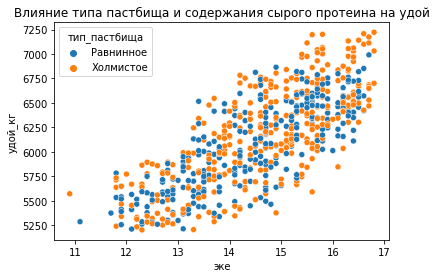

In [46]:
sns.scatterplot(x='эке', y='удой_кг', data=ferma_main, palette='tab10', hue='тип_пастбища')
plt.title('Влияние типа пастбища и содержания сырого протеина на удой');

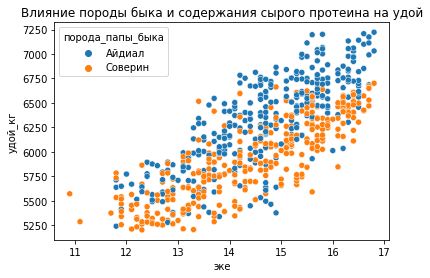

In [47]:
sns.scatterplot(x='эке', y='удой_кг', data=ferma_main, palette='tab10', hue='порода_папы_быка')
plt.title('Влияние породы быка и содержания сырого протеина на удой');

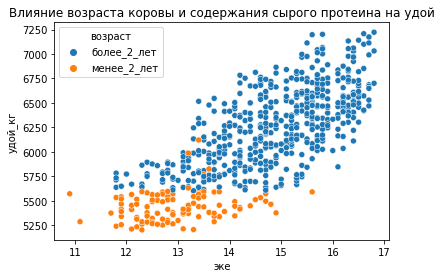

In [48]:
sns.scatterplot(x='эке', y='удой_кг', data=ferma_main, palette='tab10', hue='возраст')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

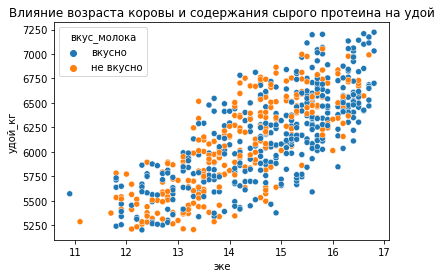

In [49]:
sns.scatterplot(x='эке', y='удой_кг', data=ferma_main, palette='tab10', hue='вкус_молока')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

## Сырой протеин - удой

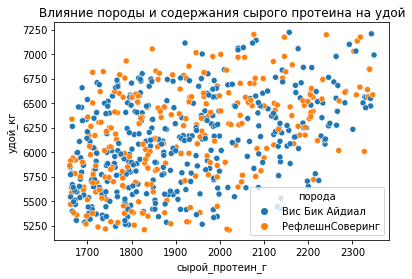

In [50]:
sns.scatterplot(x='сырой_протеин_г', y='удой_кг', data=ferma_main, palette='tab10', hue='порода')
plt.title('Влияние породы и содержания сырого протеина на удой');

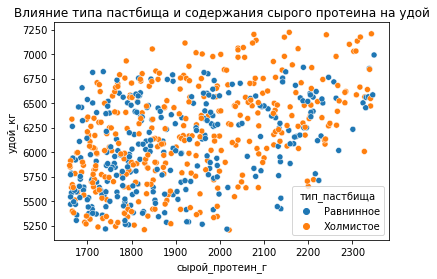

In [51]:
sns.scatterplot(x='сырой_протеин_г', y='удой_кг', data=ferma_main, palette='tab10', hue='тип_пастбища')
plt.title('Влияние типа пастбища и содержания сырого протеина на удой');

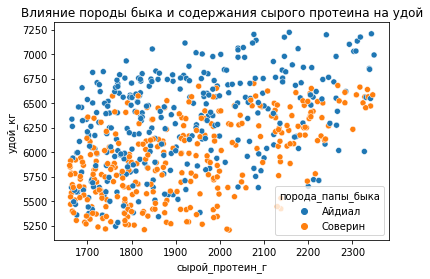

In [52]:
sns.scatterplot(x='сырой_протеин_г', y='удой_кг', data=ferma_main, palette='tab10', hue='порода_папы_быка')
plt.title('Влияние породы быка и содержания сырого протеина на удой');

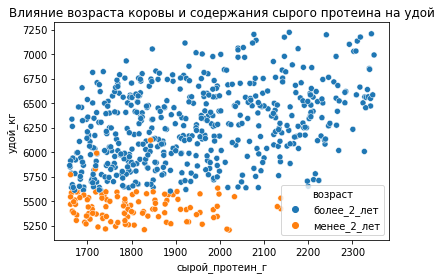

In [53]:
sns.scatterplot(x='сырой_протеин_г', y='удой_кг', data=ferma_main, palette='tab10', hue='возраст')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

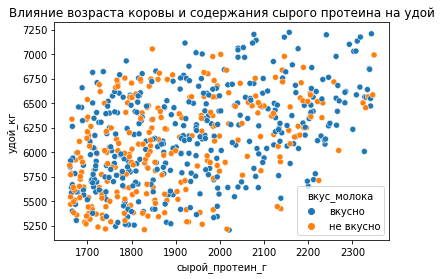

In [54]:
sns.scatterplot(x='сырой_протеин_г', y='удой_кг', data=ferma_main, palette='tab10', hue='вкус_молока')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

## СПО - УДОЙ

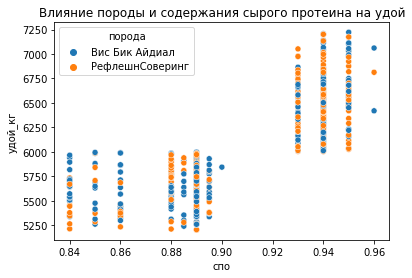

In [55]:
sns.scatterplot(x='спо', y='удой_кг', data=ferma_main, palette='tab10', hue='порода')
plt.title('Влияние породы и содержания сырого протеина на удой');

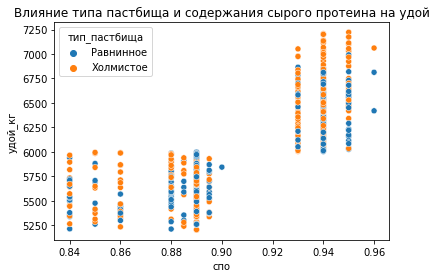

In [56]:
sns.scatterplot(x='спо', y='удой_кг', data=ferma_main, palette='tab10', hue='тип_пастбища')
plt.title('Влияние типа пастбища и содержания сырого протеина на удой');

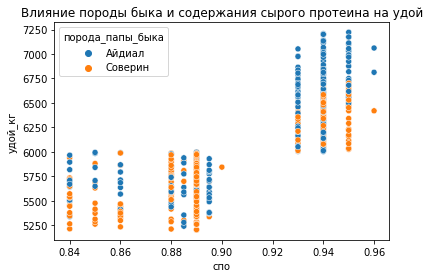

In [57]:
sns.scatterplot(x='спо', y='удой_кг', data=ferma_main, palette='tab10', hue='порода_папы_быка')
plt.title('Влияние породы быка и содержания сырого протеина на удой');

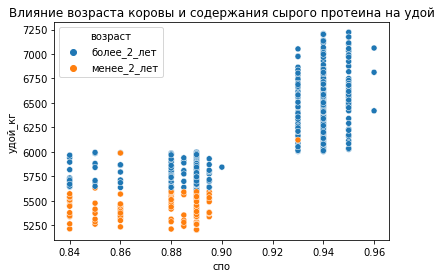

In [58]:
sns.scatterplot(x='спо', y='удой_кг', data=ferma_main, palette='tab10', hue='возраст')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

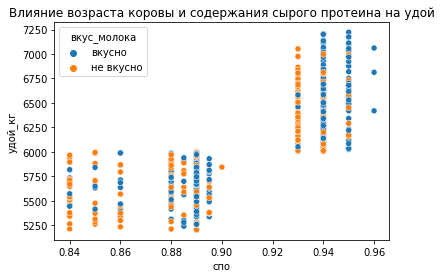

In [59]:
sns.scatterplot(x='спо', y='удой_кг', data=ferma_main, palette='tab10', hue='вкус_молока')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

## Жирность - удой

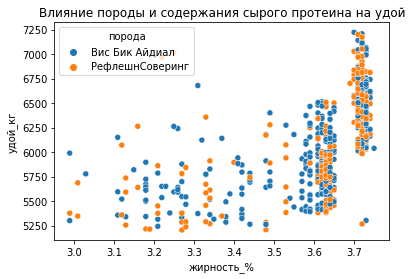

In [60]:
sns.scatterplot(x='жирность_%', y='удой_кг', data=ferma_main, palette='tab10', hue='порода')
plt.title('Влияние породы и содержания сырого протеина на удой');

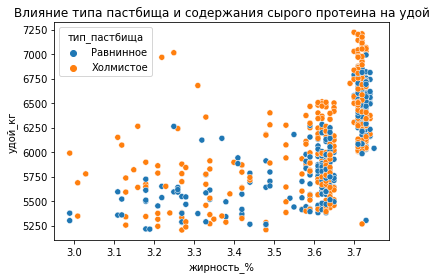

In [61]:
sns.scatterplot(x='жирность_%', y='удой_кг', data=ferma_main, palette='tab10', hue='тип_пастбища')
plt.title('Влияние типа пастбища и содержания сырого протеина на удой');

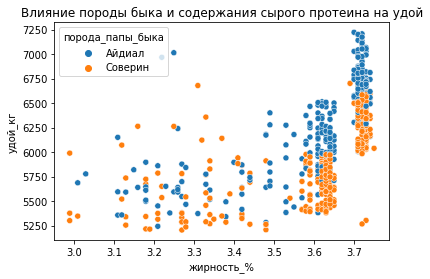

In [62]:
sns.scatterplot(x='жирность_%', y='удой_кг', data=ferma_main, palette='tab10', hue='порода_папы_быка')
plt.title('Влияние породы быка и содержания сырого протеина на удой');

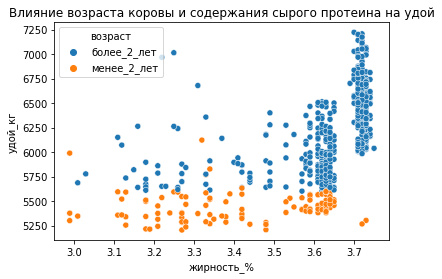

In [63]:
sns.scatterplot(x='жирность_%', y='удой_кг', data=ferma_main, palette='tab10', hue='возраст')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

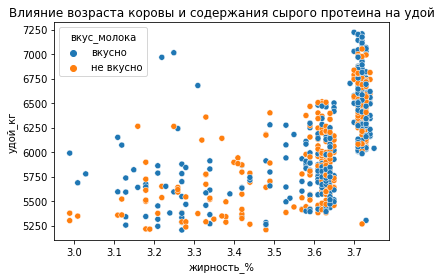

In [64]:
sns.scatterplot(x='жирность_%', y='удой_кг', data=ferma_main, palette='tab10', hue='вкус_молока')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

## Белок - удой

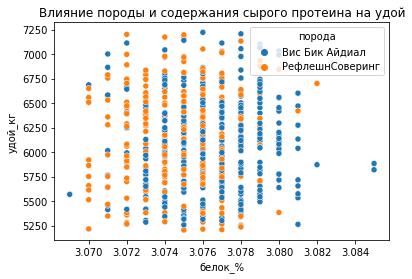

In [65]:
sns.scatterplot(x='белок_%', y='удой_кг', data=ferma_main, palette='tab10', hue='порода')
plt.title('Влияние породы и содержания сырого протеина на удой');

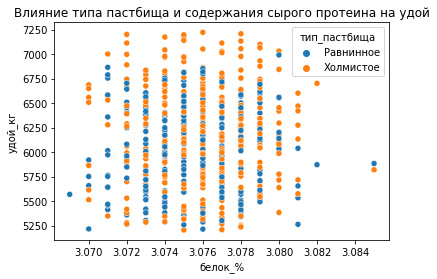

In [66]:
sns.scatterplot(x='белок_%', y='удой_кг', data=ferma_main, palette='tab10', hue='тип_пастбища')
plt.title('Влияние типа пастбища и содержания сырого протеина на удой');

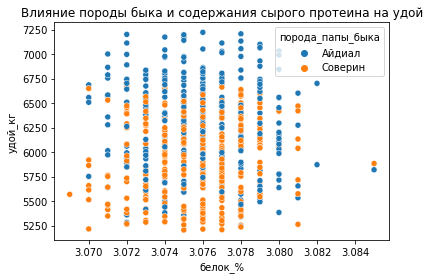

In [67]:
sns.scatterplot(x='белок_%', y='удой_кг', data=ferma_main, palette='tab10', hue='порода_папы_быка')
plt.title('Влияние породы быка и содержания сырого протеина на удой');

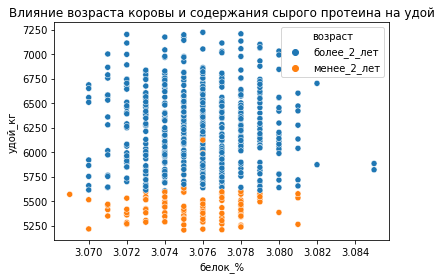

In [68]:
sns.scatterplot(x='белок_%', y='удой_кг', data=ferma_main, palette='tab10', hue='возраст')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

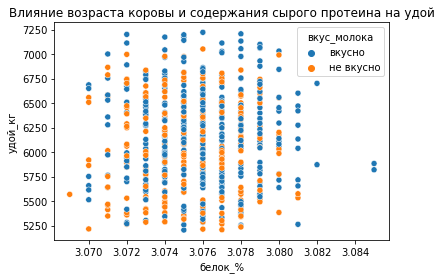

In [69]:
sns.scatterplot(x='белок_%', y='удой_кг', data=ferma_main, palette='tab10', hue='вкус_молока')
plt.title('Влияние возраста коровы и содержания сырого протеина на удой');

Вывод: Выявлена зависимость целевого признака Удой,кг от входного категориального признака Возраст.
Белок никак не влияет на Удой, ЭКЕ имеет сильную и относительно линейную связь, Протеин имеет слабую и нелинейную зависимость. Жирность и СПО имеют ненормальное распределение.

Мультиколлениарность не наблюдается. Максимальная корреляция между признаками - между признаками СПО и ЭКЕ 0,75

Для построения модели целесообразно использовать следующие признаки:
- количественные характеристики: ЭКЕ, Протеин, СПО
- категориальные признаки: Порода, Тип пастбища, Порода папы быка, Возраст



<a id="5"></a> 
## Обучение модели линейной регрессии

Построим модель линейной регрессии на данных датасета farm_main.csv. Создадим функцию для упрощения создания модели Используем в качестве целевого признак Удой, кг.

In [70]:
def test_model(data,b,cat_col_name_input,num_col_name_input):
    RANDOM_STATE = 42
    
    X = data.drop(b, axis=1)
    y = data[b]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    )
    
    cat_col_names = cat_col_name_input
    num_col_names = num_col_name_input
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    
    encoder_col_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    model_lr  = LinearRegression()
    model_lr = model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    
    residuals = y_test - predictions
    r2 = r2_score(y_test, predictions)  
    return [r2, predictions,residuals, y_test, encoder ,scaler, model_lr]

In [71]:
cat_col_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_name = ['эке', 'спо', 'сырой_протеин_г']

model_1 = test_model(ferma_main,'удой_кг',cat_col_name,num_col_name)
print('r2 =' ,model_1[0])

r2 = 0.7844078173416966


In [72]:
def graf_residuals_model(model):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(model[2])
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(x=model[1], y=model[2])
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

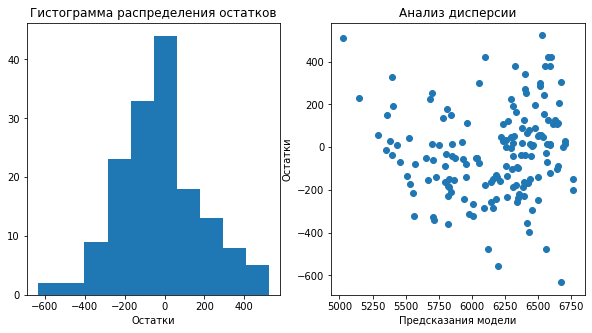

In [73]:
graf_residuals_model(model_1)

Точность модели составляет 78.4%, По анализу дисперсии модель имеет нормальную дисперсию и небольшое смещение вправо, что говорит нам о том, что модель может предсказать необходимый целевой признак.

Одним из возможных вариантов повышения качества модели:
- включить в модель СПО как категориальный признак
- взять квадрат ЭКЕ

Обновим модель, включив в модель СПО как категориальный признак и взяв квадрат ЭКЕ

In [74]:
ferma_main['спо_ohe'] = (ferma_main['спо'] < 0.92).astype('int')
ferma_main['эке_2'] = ferma_main['эке'] ** 2

/tmp/ipykernel_48/771197182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['спо_ohe'] = (ferma_main['спо'] < 0.92).astype('int')
/tmp/ipykernel_48/771197182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main['эке_2'] = ferma_main['эке'] ** 2


In [75]:
cat_col_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_ohe']
num_col_name = ['эке_2', 'сырой_протеин_г']

model_2 = test_model(ferma_main,'удой_кг',cat_col_name,num_col_name)
print('r2 =' ,model_2[0])

r2 = 0.8180879926867501


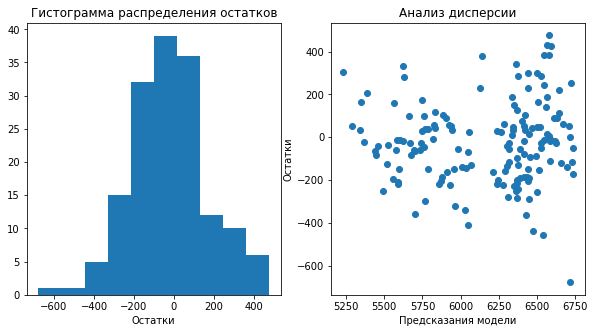

In [76]:
graf_residuals_model(model_2)

R2 увеличился и стал 81.8 % Улучшена дисперсия, смещение осталась.

Обновим модель, добавив из датасета ferma_dad категориальный признак 'Имя папы'

In [77]:
ferma_main_dad = ferma_main.merge(ferma_dad, how  ='inner', on = 'id')

In [78]:
cat_col_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_ohe','имя_папы']
num_col_name = ['эке_2', 'сырой_протеин_г']

model_3 = test_model(ferma_main_dad,'удой_кг',cat_col_name,num_col_name)
print('r2 =' ,model_3[0])

r2 = 0.8247542745210408


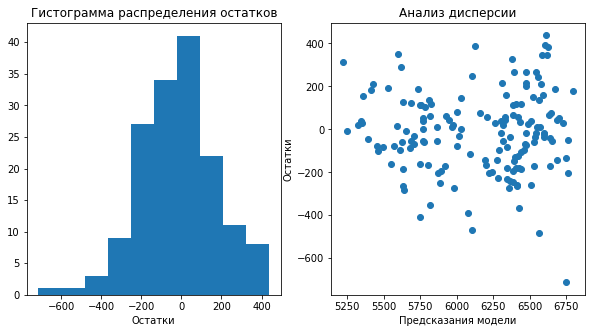

In [79]:
graf_residuals_model(model_3)

R2 увеличился незначительно и стал 82.5% Распределение остатков: улучшена дисперсия, небольшое смещение влево.

Рассчитаем метрики моделей

In [80]:
def metric_model(a, b, c):
    mae = mean_absolute_error(b, c)
    mse = mean_squared_error(b, c)
    rmse = np.sqrt(mse)
    print(a, ', mae:',mae, ', mse:', mse, ', rmse:', rmse)

In [81]:
metric_model('Модель 1', model_1[3], model_1[1])
metric_model('Модель 2', model_2[3], model_2[1])
metric_model('Модель 3', model_3[3], model_3[1])

Модель 1 , mae: 164.2419446347493 , mse: 43887.01500966052 , rmse: 209.49227911706083
Модель 2 , mae: 149.03965222364604 , mse: 37030.91131113695 , rmse: 192.43417396901452
Модель 3 , mae: 146.16302445362308 , mse: 35673.88988618191 , rmse: 188.8753289505591


In [82]:
print('95% доверительный интервал:', st.norm.interval(0.95, loc=np.mean(model_3[1]), scale=st.sem(model_3[1])))

95% доверительный интервал: (6092.340075854288, 6221.3750700583805)


Исходя из сравнения метрик R2, MAE, MSE и RMSE, можно сделать вывод, что модель № 3 наиболее точна, ее предсказания в среднем меньше отличаются от истинных значений, чем у первых двух моделей

Возьмем Модель 3 и предскажем значение удоя по датасету cow_buy

In [83]:
cow_buy['эке'] = ferma_main['эке'].mean() * 1.05
cow_buy['спо'] = ferma_main['спо'].mean() * 1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean() * 1.05

cow_buy['спо_ohe'] = (cow_buy['спо'] < 0.92).astype('int')
cow_buy['эке_2'] = cow_buy['эке'] ** 2

In [84]:
X_new = cow_buy.drop(['текущая_жирность_%', 'текущий_уровень_белка_%', 'эке', 'спо'], axis=1)

In [85]:
RANDOM_STATE = 42

X = ferma_main_dad.drop(['удой_кг'], axis=1)
y = ferma_main_dad['удой_кг']

X_new = cow_buy.drop(['текущая_жирность_%', 'текущий_уровень_белка_%', 'эке', 'спо'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_ohe', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'эке_2']

encoder = OneHotEncoder(drop='first', sparse= False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns= encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns= encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

X_new_ohe = encoder.transform(X_new[cat_col_names])
X_new_scaled = scaler.transform(X_new[num_col_names])

X_new_ohe = pd.DataFrame(X_new_ohe, columns= encoder_col_names)
X_new_scaled = pd.DataFrame(X_new_scaled, columns= num_col_names)
X_new = pd.concat([X_new_ohe, X_new_scaled], axis=1)
predictions_new = model_lr.predict(X_new)

In [86]:
predictions_new

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

In [87]:
predictions_new

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

In [88]:
cow_buy['удой_кг'] = predictions_new

# проверим результат
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст,эке,спо,сырой_протеин_г,спо_ohe,эке_2,удой_кг
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6378.711028
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6593.089377
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6542.146066
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6425.380218
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6571.259737
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6400.540668


__Вывод:__ После обучение модели линейной регрессии мы получили значения удоя выше 6000 кг. Таким образом по первому требованию заказчика у нас подходят все коровы.

<a id="6"></a> 
## Обучение модели логистической регрессии

Построим модель логистической регрессии на данных датасета farm_main.csv. Используем в качестве целевого признак Вкус молока.

In [89]:
cow_buy['вкус_молока'] = 0

In [90]:
RANDOM_STATE = 42

X_cl = ferma_main.drop(['вкус_молока'], axis=1)
y_cl = ferma_main['вкус_молока']

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, random_state= RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_ohe']
num_col_names = ['сырой_протеин_г', 'эке_2','жирность_%']

encoder_cl = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_cl = encoder_cl.fit_transform(X_train_cl[cat_col_names])
X_test_ohe_cl = encoder_cl.transform(X_test_cl[cat_col_names])

encoder_col_names_cl = encoder_cl.get_feature_names()

scaler_cl = StandardScaler()
X_train_scaled_cl = scaler_cl.fit_transform(X_train_cl[num_col_names])
X_test_scaled_cl = scaler_cl.transform(X_test_cl[num_col_names])

X_train_ohe_cl = pd.DataFrame(X_train_ohe_cl, columns= encoder_col_names_cl)
X_test_ohe_cl = pd.DataFrame(X_test_ohe_cl, columns= encoder_col_names_cl)
X_train_scaled_cl = pd.DataFrame(X_train_scaled_cl, columns= num_col_names)
X_test_scaled_cl = pd.DataFrame(X_test_scaled_cl, columns= num_col_names)

X_train_cl = pd.concat([X_train_ohe_cl, X_train_scaled_cl], axis=1)
X_test_cl = pd.concat([X_test_ohe_cl, X_test_scaled_cl], axis=1)

y_train_cl = y_train_cl.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_cl = y_test_cl.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = LogisticRegression()
clf = clf.fit(X_train_cl, y_train_cl)
y_cl_pred = clf.predict(X_test_cl)

acc = accuracy_score(y_test_cl, y_cl_pred)  
precision = precision_score(y_test_cl, y_cl_pred) 
recall = recall_score(y_test_cl, y_cl_pred)  

In [91]:
y_cl_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

In [91]:
print('Accuracy =', round(acc, 2))
print('Precision =',round(precision, 2))
print('Recall =',round(recall, 2))

Accuracy = 0.62
Precision = 0.61
Recall = 0.85


Text(0.5, 1.0, 'Матрица ошибок')

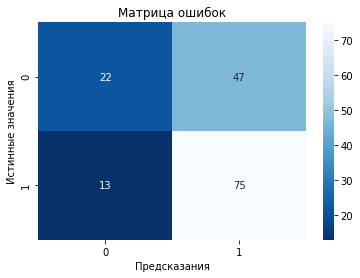

In [92]:
cm = confusion_matrix(y_test_cl, y_cl_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказания')
plt.title('Матрица ошибок')

Модель вычислила верно 85 % коров со вкусным молоком. Но фермеру важно, чтобы молоко всегда было вкусным. Для этого нужно минимизировать ошибку классификации невкусного молока как вкусного. Для этого надо улучшить метрику Precision.

Поработаем с порогом классификации модели

In [93]:
y_proba = clf.predict_proba(X_test_cl)[:,1]

data = pd.DataFrame(zip(y_test_cl, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

display(data.head())

,y_valid,y_proba
146,1,0.859137
85,1,0.843325
152,1,0.838547
114,1,0.835953
13,1,0.828845


In [94]:
thresholds = [round(i,2) for i in np.linspace(0.5,0.8,num = 20,endpoint=False)]

In [95]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)

display(data.head())

,y_valid,y_proba,y_pred_0.5,y_pred_0.52,y_pred_0.53,y_pred_0.55,y_pred_0.56,y_pred_0.57,y_pred_0.59,y_pred_0.6,...,y_pred_0.65,y_pred_0.66,y_pred_0.68,y_pred_0.7,y_pred_0.71,y_pred_0.73,y_pred_0.74,y_pred_0.76,y_pred_0.77,y_pred_0.78
146,1,0.859137,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
85,1,0.843325,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
152,1,0.838547,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
114,1,0.835953,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13,1,0.828845,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [96]:
porog = []
porog = pd.DataFrame(columns=['Порог', 'Precision', 'Accuracy'])

rw = 0
for i in data.columns[2:]:
    precision_table = precision_score(data['y_valid'],data[i])
    accuracy_table = accuracy_score(data['y_valid'],data[i])
    porog.loc[rw] = [i, precision_table, accuracy_table]
    rw = rw+1
display(porog)

,Порог,Precision,Accuracy
0,y_pred_0.5,0.614754,0.617834
1,y_pred_0.52,0.632479,0.636943
2,y_pred_0.53,0.632479,0.636943
3,y_pred_0.55,0.646018,0.649682
4,y_pred_0.56,0.651376,0.649682
5,y_pred_0.57,0.669903,0.662420
6,y_pred_0.59,0.688172,0.662420
7,y_pred_0.6,0.688889,0.656051
8,y_pred_0.62,0.717949,0.656051
9,y_pred_0.64,0.718310,0.636943


In [97]:
preds = clf.predict_proba(X_test_cl)[:,1] > 0.71
acc = accuracy_score(y_test_cl, preds)  
precision = precision_score(y_test_cl, preds) 
recall = recall_score(y_test_cl, preds) 

Accuracy =  0.62
Precision =  0.84
Recall =  0.41


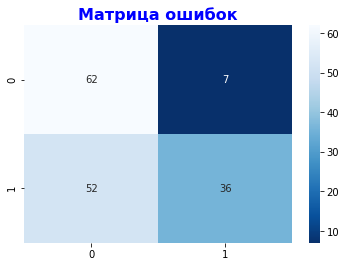

In [98]:
cm = confusion_matrix(y_test_cl, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.title('Матрица ошибок', fontsize=16, fontweight="bold", color='blue')
print('Accuracy = ', round(acc, 2))
print('Precision = ',round(precision, 2))
print('Recall = ',round(recall, 2))

Модель вычислила верно 40 % коров со вкусным молоком. Но теперь наша модель с меньшей вероятностью предскажет невкусное молоко как вкусное.

Применим нашу модель на датасете cow_buy

In [99]:
RANDOM_STATE = 42

X_cl = ferma_main.drop(['вкус_молока'], axis=1)
y_cl = ferma_main['вкус_молока']

X_new_cl = cow_buy.drop(['эке', 'спо', 'удой_кг'], axis=1)

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, random_state= RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_ohe']
num_col_names = ['сырой_протеин_г', 'эке_2']

encoder_cl = OneHotEncoder(drop='first', sparse= False)
X_train_ohe_cl = encoder_cl.fit_transform(X_train_cl[cat_col_names])
X_test_ohe_cl = encoder_cl.transform(X_test_cl[cat_col_names])

encoder_col_names_cl = encoder_cl.get_feature_names()

scaler_cl = StandardScaler()
X_train_scaled_cl = scaler_cl.fit_transform(X_train_cl[num_col_names])
X_test_scaled_cl = scaler_cl.transform(X_test_cl[num_col_names])

X_train_ohe_cl = pd.DataFrame(X_train_ohe_cl, columns= encoder_col_names_cl)
X_test_ohe_cl = pd.DataFrame(X_test_ohe_cl, columns= encoder_col_names_cl)
X_train_scaled_cl = pd.DataFrame(X_train_scaled_cl, columns= num_col_names)
X_test_scaled_cl = pd.DataFrame(X_test_scaled_cl, columns= num_col_names)

X_train_cl = pd.concat([X_train_ohe_cl, X_train_scaled_cl], axis=1)
X_test_cl = pd.concat([X_test_ohe_cl, X_test_scaled_cl], axis=1)

y_train_cl = y_train_cl.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_cl = y_test_cl.apply(lambda x: 1 if x == 'вкусно' else 0)

clf = LogisticRegression()
clf = clf.fit(X_train_cl, y_train_cl)

X_new_cl_ohe = encoder_cl.transform(X_new_cl[cat_col_names])
X_new_cl_scaled = scaler_cl.transform(X_new_cl[num_col_names])

X_new_cl_ohe = pd.DataFrame(X_new_cl_ohe, columns= encoder_col_names_cl)
X_new_cl_scaled = pd.DataFrame(X_new_cl_scaled, columns= num_col_names)
X_new_cl = pd.concat([X_new_cl_ohe, X_new_cl_scaled], axis=1)

preds = clf.predict_proba(X_new_cl)[:,1] > 0.71


In [100]:
preds

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [101]:
cow_buy['y_pred'] = preds

cow_buy['Вкус молока'] = cow_buy['y_pred'].apply(lambda x: 'вкусно' if x > 0.71 else 'не вкусно')      

cow_buy = cow_buy.sort_values(by = ['y_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_pred') 

display(cow_buy.reset_index(drop=True))

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст,эке,спо,сырой_протеин_г,спо_ohe,эке_2,удой_кг,вкус_молока,Вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно
3,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6617.928926,0,не вкусно
4,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6571.259737,0,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6425.380218,0,не вкусно
6,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6344.707860,0,не вкусно
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6593.089377,0,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6283.999775,0,не вкусно
9,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6127.474742,0,не вкусно


In [102]:
display(cow_buy[cow_buy['Вкус молока'] == 'вкусно'])

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белка_%,возраст,эке,спо,сырой_протеин_г,спо_ohe,эке_2,удой_кг,вкус_молока,Вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,0.958744,2019.947532,0,233.361138,6609.919297,0,вкусно


Вывод: Вкусное молоко дают коровы с id: 0, 6, 12.


## Итоговые выводы

При проведении анализа данных были выявлены следующие результаты:

- В столбце 'Удой_кг' датафрейма ferma_main был обнаружен и удалён один выброс.
- Из всех количественных признаков нормальное распределение имеет только признак 'Белок в %' в датафрейме ferma_main.
- В молочном хозяйстве фермера доля невкусного молока составляет 41 %.
- По возрастному соотношению в обоих хозяйствах большинство коров возраста более 2 лет (83%).

Фермер может купить 3 коровы из стада с минимальным риском для себя. Это обусловлено тем, что данные три коровы удовлетворяют требованиям фермера по удоям (не менее 6000 кг в год) и качеству молока (вкусное молоко). Этот выбор основывается на моделях машинного обучения, которые были разработаны и протестированы для предсказания удоев и вкуса молока. Учитывая минимальное значение критической ошибки (порог 0.71), выбор этих коров позволяет минимизировать риски приобретения животных, которые не удовлетворят требованиям фермера.
Дополнительные рекомендации:
 - Проведение дополнительных проверок:
        Рекомендуется провести независимую проверку удоев и качества молока у выбранных коров, чтобы убедиться в точности прогнозов моделей.

 - Анализ дополнительных факторов:
        Стоит учитывать такие факторы, как возраст, состояние здоровья и генетическая предрасположенность коров, которые могут влиять на продуктивность и качество молока.

 - Оптимизация критериев:
        Если фермер планирует приобрести больше коров, стоит рассмотреть возможность немного снизить требования ко вкусу молока, так как по удоям требованиям соответствуют все предложенные коровы.

Для улучшения качества регрессионной модели мы использовали 2 метода:
 - Преобразование признаков:
        Преобразование признака СПО в категориальный бинарный признак для устранения нелинейности.
        Возведение значений признака ЭКЕ в квадрат.
 - Удаление нерелевантных признаков:
        Исключение признаков, не влияющих на целевую переменную, таких как Белок и Жирность.

Результаты регрессионной модели можно ещё улучшить при помощи:

 - Увеличение объёма данных:
        Собрать и использовать больше данных для обучения моделей, что может улучшить их обобщающую способность.

 - Использование более сложных моделей:
        Рассмотреть использование более сложных моделей машинного обучения.

В проекте для отображения качества модели были выбраны метрики:

 - Precision (Точность):
        Важна для минимизации ложноположительных предсказаний, что критично при принятии решений, связанных с качеством молока.

 - Recall (Полнота):
        Важна для минимизации ложноотрицательных предсказаний, что позволяет выявить как можно больше подходящих коров.

 - Accuracy (Точность предсказаний):
        Общая точность модели, хотя для несбалансированных данных может быть менее информативной.

Эти метрики позволяют более точно оценить и минимизировать риски при принятии решений, связанных с покупкой животных и экономическими расчётами в молочном хозяйстве.